# Install and import libraries

In [8]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Load and Inspection of data

In [11]:
df = pd.read_csv(r"C:\Users\ahana\Downloads\loan_data.csv")

In [12]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


# Data Inspection

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [14]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [15]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

# Encoding Categorical Columns

In [16]:
binary_cols = ('person_gender','previous_loan_defaults_on_file')

In [17]:
le = LabelEncoder()

In [18]:
binary_cols =['person_gender', 'previous_loan_defaults_on_file']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [19]:
multi_cols = ['person_education','person_home_ownership','loan_intent']

In [20]:
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

In [21]:
print(df.head())

   person_age  person_gender  person_income  person_emp_exp  loan_amnt  \
0        22.0              0        71948.0               0    35000.0   
1        21.0              0        12282.0               0     1000.0   
2        25.0              0        12438.0               3     5500.0   
3        23.0              0        79753.0               0    35000.0   
4        24.0              1        66135.0               1    35000.0   

   loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0          16.02                 0.49                         3.0   
1          11.14                 0.08                         2.0   
2          12.87                 0.44                         3.0   
3          15.23                 0.44                         2.0   
4          14.27                 0.53                         4.0   

   credit_score  previous_loan_defaults_on_file  ...  \
0           561                               0  ...   
1           504             

In [22]:
print(df.columns)

Index(['person_age', 'person_gender', 'person_income', 'person_emp_exp',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status',
       'person_education_Bachelor', 'person_education_Doctorate',
       'person_education_High School', 'person_education_Master',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')


# Define features and Target

In [23]:
target = 'loan_status'
x = df.drop(columns=[target]) #Features
y = df[target] #Target

# Training and Test Sets

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Handle imbalanced classes

In [25]:
#Apply SMOTE to balance classes
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train,y_train)

# Scale numeric features

In [27]:
#Standardscaler scale features mean=0 and std=1
scaler = StandardScaler()
x_train_res = scaler.fit_transform(x_train_res)
x_test = scaler.transform(x_test)

# Train Models

In [29]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_res, y_train_res)
y_pred_lr = log_reg.predict(x_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x_train_res, y_train_res)
y_pred_rf = rf.predict(x_test)

# Evaluate Models

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     10500
           1       0.67      0.83      0.74      3000

    accuracy                           0.87     13500
   macro avg       0.81      0.86      0.83     13500
weighted avg       0.89      0.87      0.88     13500


Random Forest Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10500
           1       0.80      0.83      0.81      3000

    accuracy                           0.91     13500
   macro avg       0.87      0.88      0.88     13500
weighted avg       0.92      0.91      0.91     13500

Random Forest ROC-AUC: 0.9678749999999999


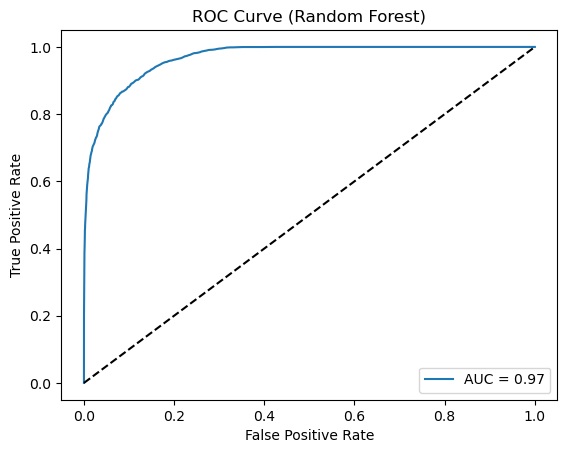

In [30]:
# Classification reports
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))

# ROC-AUC for Random Forest
y_proba_rf = rf.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test, y_proba_rf)
print("Random Forest ROC-AUC:", auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve (Random Forest)")
plt.show()

# Feature Importance

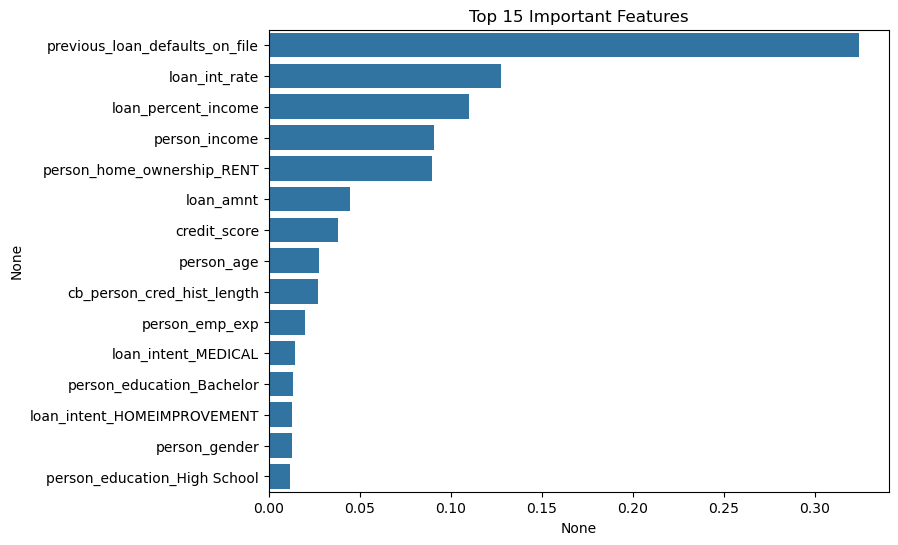

In [33]:
# Random Forest feature importance
importances = pd.Series(rf.feature_importances_, index=x.columns)
top_features = importances.nlargest(15)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 15 Important Features")
plt.show()

In [35]:
import pickle
with open('loan_rf_model.pkl','wb') as f:
    pickle.dump(rf, f)